# Análise Exploratória - Melhor Canal de Contato

#### Importando as bibliotecas

In [2]:
import warnings

warnings.filterwarnings("ignore")


import io
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt

from xgboost import plot_importance, plot_tree

# from prophet import Prophet
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.preprocessing import StandardScaler

from dateutil.relativedelta import relativedelta
from calendar import monthrange
from datetime import datetime
from datetime import date

#pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)


def MAPE(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


%load_ext lab_black
%matplotlib inline


class color:  # para formatar os prints
    PURPLE = "\033[95m"
    CYAN = "\033[96m"
    DARKCYAN = "\033[36m"
    BLUE = "\033[94m"
    GREEN = "\033[92m"
    YELLOW = "\033[93m"
    RED = "\033[91m"
    BOLD = "\033[1m"
    UNDERLINE = "\033[4m"
    END = "\033[0m"


print(color.BOLD + "Teste!" + color.END)

Teste!


<br>

# Análise Superficial

<br>

#### Importando a base BOV_FIBRA -> Mês de Novembro de 2021

In [3]:
df = pd.read_csv(
    r"C:\Users\013809631\Box\Python_Scripts\Projeto_Oi_Tahto\Bases\Bases_Propensao\BOV_FIBRA_UGR_BTCC_2021-11-30.csv",
    delimiter=";",
    encoding="ISO-8859-1",
)

#### Cabeçalho do Dataframe - BOV_FIBRA

In [18]:
df.head()

,INDICADOR,PRODUTO,CANAL,PARCEIRO,OPERAÇÃO,ILHA,DT_ABERTURA,NUMERO_PEDIDO,TIPO,DATA_PEDIDO,STATUS,DATA_STATUS,NUM_IDENTIDADE,NOME_CLIENTE,TELEFONE_CONTATO,TIPO_LOGRADOURO_COBRANCA,NOME_LOGRADOURO_COBRANCA,NUMERO_COBRANCA,TIPO_LOGRADOURO_INSTALACAO,NOME_LOGRADOURO_INSTALACAO,NUMERO_INSTALACAO,BAIRRO_INSTALACAO,MUNICIPIO_INSTALACAO,ESTADO_INSTALACAO,CEP_INSTALACAO,NUM_LOCALIDADE,DDD_FIXO,NUMERO_FIXO,VELOCIDADE,LINHA_PRODUTO,NOME_CAMPANHA,NOME_OFERTA,CODIGO_SAP,LOGIN_VENDEDOR,PEDIDO_CRIADO_POR,NUMERO_DOCUMENTO,TIPO_PROMOCAO,ID_BUNDLE,IND_COMBO,PLANO_BUNDLE,TIPO_POSSE_COMBO,SIT_BUNDLE,FLG_MIG_COBRE_FIXO,FLG_MIG_COBRE_VELOX,TIPO_REDE,DT_FECHAMENTO,FLG_VENDA_VALIDA,UNIDADE_NEGOCIO,FLG_MIG_TV,REUSO_MANCHA,NOVA_UGR,LOGIN_OIT,MATRICULA_FINAL,PDV_NOVA_REGRA,CANAL_NOVA_REGRA,OPERACAO_NOVA_REGRA,PARCEIRO_NOVA_REGRA,DT_ABERTURA_NOVA_REGRA,LOGIN_VENDEDOR_NOVA_REGRA,CANAL_BOV_NOVA_REGRA,METODO_PAGAMENTO,PLANO,Unnamed: 62,Unnamed: 63,Unnamed: 64,BC,"Tahto,,,,"
0,VL,BL FIBRA,WEB DIRETO TLV,BTCC,BTCC RES (WEB FORM FIBRA),FORMULÁRIO,20211130,4-86068106305,Venda,20211130,Em Aprovisionamento,20211130,123123123,DANIEL MARINHO SERAPHIM,"5,52E+12",RUA,SEN DANTAS,117,RUA,SEN DANTAS,117,CENTRO,RIO DE JANEIRO,RJ,20031911,5000,21.0,24866251.0,400 MBPS,Fibra,NaN,BD_OITOTAL_VOIP+BL,1050774.0,NI,BRMRDBMS,5298357709,Oi Total,1-1RM2T3WM,MULTI,NaN,NaN,NaN,N,N,NI,NaN,S,VARRES,N,NaN,S,BC744647,NI,1050774.0,WEB DIRETO TLV,BTCC RES (WEB FORM FIBRA),BTCC,20211130.0,BC744647,WEB,1 - BOLETO,BANDA LARGA 400MBPS,NaN,NaN,NaN,CC,"contax,,,"
1,VL,FIXO FIBRA,WEB DIRETO TLV,BTCC,BTCC (FIBRA DIGITAL PAV),PA VIRTUAL,20211130,4-86112363557,Venda,20211130,Em Aprovisionamento,20211130,0,JOANA NUNES WIEDENHOFT,"5,55E+12",RUA,VSC DE TAUNAY,370,RUA,VSC DE TAUNAY,370,HARMONIA,CANOAS,RS,92310550,4450,51.0,34683781.0,NaN,Fibra,NaN,BD_OITOTAL_VOIP+BL,1055735.0,NI,BRMRDBMS,4336699003,Oi Total,1-1RMAY3UL,MULTI,NaN,NaN,NaN,N,N,NI,NaN,S,VARRES,N,NaN,S,BC760690,NI,1055735.0,WEB DIRETO TLV,BTCC (FIBRA DIGITAL PAV),BTCC,20211130.0,BC760690,WEB,1 - BOLETO,FIXO SEM LIMITES,NaN,NaN,NaN,LQ,"lique,,,"
2,VL,FIXO FIBRA,WEB DIRETO TLV,BTCC,BTCC (BOT),WHATSAPP,20211130,4-86068878443,Venda,20211130,Em Aprovisionamento,20211130,84674743,JOSE PAULO DE MEDEIROS,"5,52E+12",RUA,PE VIEIRA,0,RUA,PE VIEIRA,0,VILAR DOS TELES,VILAR DOS TELES,RJ,25560030,8657,21.0,26500229.0,NaN,Fibra,NaN,BD_OITOTAL_VOIP+BL,1054016.0,NI,BRMRDBMS,877320764,Oi Total,1-1RM2VHVQ,MULTI,NaN,NaN,NaN,N,N,NI,NaN,S,VARRES,N,NaN,S,BC732870,NI,1055604.0,NaN,NaN,NaN,20211118.0,BC732870,PAP,1 - BOLETO,FIXO SEM LIMITES,NaN,NaN,NaN,TR,"Lojas,,,"
3,VL,BL FIBRA,WEB DIRETO TLV,BTCC,BTCC (BOT),WHATSAPP,20211130,4-86137221759,Venda,20211130,Em Aprovisionamento,20211130,"1,11E+15",THEILA SORAIA COSTA DA SILVA,"5,60E+12",RUA,PROF TOSTES,3073,RUA,PROF TOSTES,3073,BURITIZAL,MACAPA,AP,68902892,2817,96.0,32431744.0,400 MBPS,Fibra,NaN,BD_OITOTAL_VOIP+BL,1054002.0,NI,BRMRDBMS,57181870297,Oi Total,1-1RMFFY23,MULTI,NaN,NaN,NaN,N,N,NI,NaN,S,VARRES,N,NaN,S,BC759567,NI,1054002.0,WEB DIRETO TLV,BTCC (BOT),BTCC,20211130.0,BC759567,WEB,1 - BOLETO,BANDA LARGA 400MBPS,NaN,NaN,NaN,Oi,"Oi,,"
4,VL,FIXO FIBRA,WEB DIRETO TLV,BTCC,BTCC (FIBRA DIGITAL PAV),PA VIRTUAL,20211130,4-86069049927,Venda,20211130,Em Aprovisionamento,20211130,11001432703,HENRIQUE BELLI DE PINHO,"5,52E+12",RUA,DA ABOLICAO,496,RUA,DA ABOLICAO,496,ABOLICAO,RIO DE JANEIRO,RJ,20755170,5000,21.0,24904440.0,NaN,Fibra,NaN,BD_OITOTAL_VOIP+BL,1055733.0,NI,BRMRDBMS,11001432703,Oi Total,1-1RM2XICA,MULTI,NaN,NaN,NaN,N,N,NI,NaN,S,VARRES,N,NaN,S,BC761683,NI,1055733.0,WEB DIRETO TLV,BTCC (FIBRA DIGITAL PAV),BTCC,20211130.0,BC761683,WEB,1 - BOLETO,FIXO SEM LIMITES,NaN,NaN,NaN,NI,"nao identificado,,,"


#### Sumário estatístico do Dataframe

In [19]:
df.describe()

,DT_ABERTURA,DATA_PEDIDO,DATA_STATUS,NUMERO_COBRANCA,NUMERO_INSTALACAO,CEP_INSTALACAO,NUM_LOCALIDADE,DDD_FIXO,NUMERO_FIXO,CODIGO_SAP,DT_FECHAMENTO,REUSO_MANCHA,PDV_NOVA_REGRA,DT_ABERTURA_NOVA_REGRA,Unnamed: 62,Unnamed: 63,Unnamed: 64
count,8.265700e+04,8.265700e+04,8.265700e+04,82657.000000,82657.000000,8.265700e+04,82657.000000,82497.000000,8.249700e+04,8.265500e+04,7.629200e+04,0.0,7.994200e+04,7.994200e+04,0.0,0.0,0.0
mean,2.021111e+07,2.021111e+07,2.021112e+07,608.848918,609.239556,5.863074e+07,6184.859661,47.721881,3.185682e+07,1.052893e+06,2.021112e+07,NaN,1.052940e+06,2.021111e+07,NaN,NaN,NaN
std,1.135584e+02,1.135683e+02,8.693334e+00,1499.909995,1498.802834,2.641967e+07,8201.302741,22.268648,3.541609e+06,3.988207e+03,8.463414e+00,NaN,3.746965e+03,1.158482e+02,NaN,NaN,NaN
min,2.019081e+07,2.019081e+07,2.021110e+07,0.000000,0.000000,2.017011e+06,1000.000000,11.000000,2.201004e+07,1.001500e+06,2.021110e+07,NaN,1.009270e+06,2.019081e+07,NaN,NaN,NaN
25%,2.021111e+07,2.021111e+07,2.021111e+07,37.000000,37.000000,2.914602e+07,4125.000000,27.000000,3.212868e+07,1.050774e+06,2.021111e+07,NaN,1.050774e+06,2.021111e+07,NaN,NaN,NaN
50%,2.021112e+07,2.021112e+07,2.021112e+07,184.000000,185.000000,6.904817e+07,4545.000000,44.000000,3.241306e+07,1.054021e+06,2.021112e+07,NaN,1.054020e+06,2.021112e+07,NaN,NaN,NaN
75%,2.021112e+07,2.021112e+07,2.021112e+07,575.000000,576.000000,8.185070e+07,6101.000000,62.000000,3.366369e+07,1.055724e+06,2.021112e+07,NaN,1.055724e+06,2.021112e+07,NaN,NaN,NaN
max,2.021113e+07,2.021113e+07,2.021113e+07,90666.000000,90660.000000,9.950000e+07,99999.000000,99.000000,3.980098e+07,1.062223e+06,2.021113e+07,NaN,1.062047e+06,2.021113e+07,NaN,NaN,NaN


#### Contagem de valores da coluna "PLANO"

In [5]:
df["PLANO"].value_counts()

FIXO SEM LIMITES       41221
BANDA LARGA 200MBPS    21650
BANDA LARGA 400MBPS    17958
BANDA LARGA 500MBPS     1062
TOTAL HD                 627
BANDA LARGA 1GB           95
BANDA LARGA 100MBPS       22
OI FIBRA 200 MBPS         17
MIX HD                     4
Name: PLANO, dtype: int64

#### Contagem de valores da coluna "Canal"

In [6]:
df["CANAL"].value_counts()

WEB DIRETO TLV      59800
TLV ATIVO           18329
TLV RECEPTIVO        1983
WEB                  1479
RENTABILIZAÇÃO        203
WEB INDIRETO          172
S2S EMP                53
TELEAGENTES            29
WEB INDIRETO EMP        2
Name: CANAL, dtype: int64

#### Contagem de valores da coluna "Ilha"

In [7]:
df["ILHA"].value_counts()

PA VIRTUAL        28377
FORMULÁRIO        22815
FIBRA             16724
WHATSAPP          10662
WEB 0800           3005
RENTABILIZAÇÃO      203
AFILIADOS           174
S2S EMP              53
TLAG                 29
CHAT FIBRA            8
Name: ILHA, dtype: int64

### Contagem de valores da coluna "Status"

In [8]:
df["STATUS"].value_counts()

Concluído              67683
Cancelado               8597
Em Aprovisionamento     6365
Erro                      12
Name: STATUS, dtype: int64

##### Filtrando a coluna "STATUS", para que o  Dataframe contenha apenas as linhas com os seguintes valores: Concluído, Aprovisionamento & Cancelado

In [9]:
df_filtrado = df[
    (df["STATUS"] == "Concluído")
    | (df["STATUS"] == "Cancelado")
    | (df["STATUS"] == "Em Aprovisionamento")
]

##### Contagem de linhas e colunas do Dataframe filtrado

In [10]:
df_filtrado.shape

(82645, 67)

<br>

# Análises gráficas

<br>

### Distribuição de registros da variável "Plano"

Quantidade de registros por Plano (Percentual):


FIXO SEM LIMITES       49.870548
BANDA LARGA 200MBPS    26.192896
BANDA LARGA 400MBPS    21.726190
BANDA LARGA 500MBPS     1.284843
TOTAL HD                0.758566
BANDA LARGA 1GB         0.114934
BANDA LARGA 100MBPS     0.026616
OI FIBRA 200 MBPS       0.020567
MIX HD                  0.004839
Name: PLANO, dtype: float64


Text(0, 0.5, 'Soma de registros por Plano')

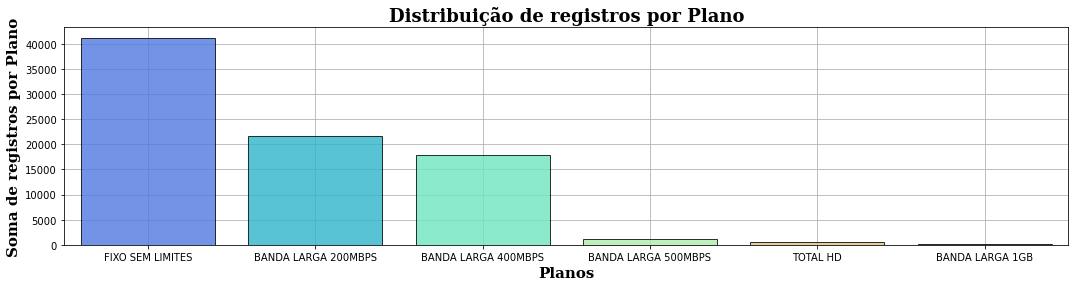

In [11]:
print(color.BOLD + "Quantidade de registros por Plano (Percentual):" + color.END)
print("\n")
print(df["PLANO"].value_counts(normalize=True) * 100)

plt.figure(figsize=(18, 4))

sns.countplot(
    data=df_filtrado,
    x="PLANO",
    # color="#33FF33",
    palette="rainbow",
    edgecolor="black",
    linewidth=1,
    alpha=0.8,
    zorder=3,
    order=df["PLANO"].value_counts().index[0:6],
)

plt.grid(True, zorder=0)

plt.title(
    "Distribuição de registros por Plano",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 18},
)
plt.xlabel(
    "Planos",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)
plt.ylabel(
    "Soma de registros por Plano",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)

### Distribuição de registros da variável "Canal"

Quantidade de registros por Canal (Percentual):


WEB DIRETO TLV      72.882389
TLV ATIVO           22.338818
TLV RECEPTIVO        2.416819
WEB                  1.802559
RENTABILIZAÇÃO       0.247410
WEB INDIRETO         0.209628
S2S EMP              0.064595
TELEAGENTES          0.035344
WEB INDIRETO EMP     0.002438
Name: CANAL, dtype: float64


Text(0, 0.5, 'Soma de registros por Canal')

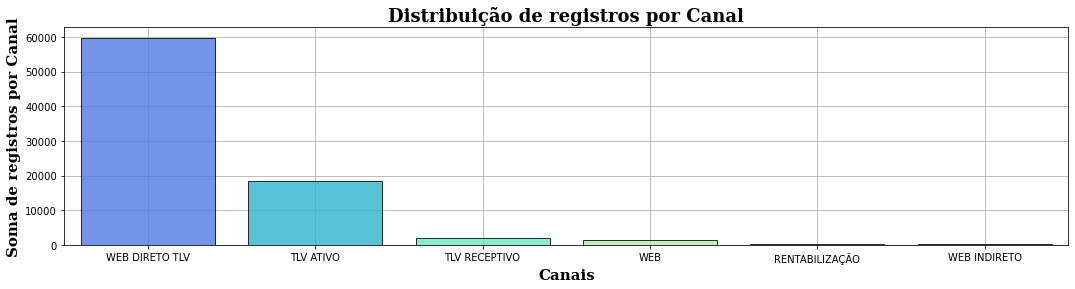

In [12]:
print(color.BOLD + "Quantidade de registros por Canal (Percentual):" + color.END)
print("\n")
print(df["CANAL"].value_counts(normalize=True) * 100)

plt.figure(figsize=(18, 4))

sns.countplot(
    data=df_filtrado,
    x="CANAL",
    # color="#33FF33",
    palette="rainbow",
    edgecolor="black",
    linewidth=1,
    alpha=0.8,
    zorder=3,
    order=df["CANAL"].value_counts().index[0:6],
)

plt.grid(True, zorder=0)

plt.title(
    "Distribuição de registros por Canal",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 18},
)
plt.xlabel(
    "Canais",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)
plt.ylabel(
    "Soma de registros por Canal",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)

### Distribuição de registros da variável "Ilha"

Quantidade de registros por Ilha (Percentual):


PA VIRTUAL        34.585009
FORMULÁRIO        27.806216
FIBRA             20.382693
WHATSAPP          12.994516
WEB 0800           3.662401
RENTABILIZAÇÃO     0.247410
AFILIADOS          0.212066
S2S EMP            0.064595
TLAG               0.035344
CHAT FIBRA         0.009750
Name: ILHA, dtype: float64


Text(0, 0.5, 'Soma de registros por ilha')

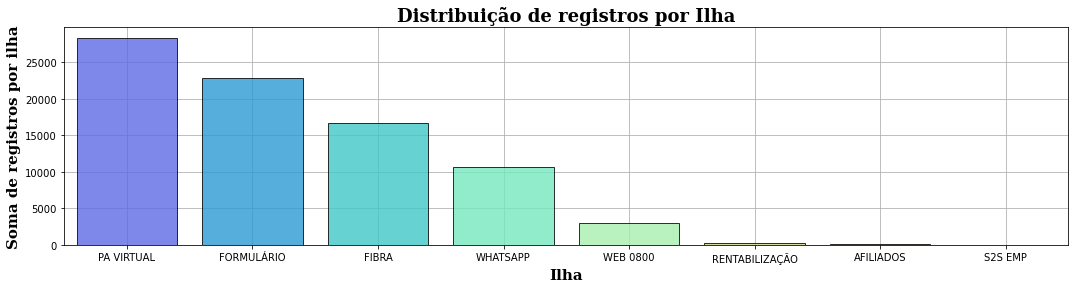

In [13]:
print(color.BOLD + "Quantidade de registros por Ilha (Percentual):" + color.END)
print("\n")
print(df["ILHA"].value_counts(normalize=True) * 100)

plt.figure(figsize=(18, 4))

sns.countplot(
    data=df_filtrado,
    x="ILHA",
    # color="#33FF33",
    palette="rainbow",
    edgecolor="black",
    linewidth=1,
    alpha=0.8,
    zorder=3,
    order=df["ILHA"].value_counts().index[0:8],
)

plt.grid(True, zorder=0)

plt.title(
    "Distribuição de registros por Ilha",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 18},
)
plt.xlabel(
    "Ilha",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)
plt.ylabel(
    "Soma de registros por ilha",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)

#### Soma de registros da base filtrada, por seu tipo de Status - Concluído, Aprovisionamento & Cancelado

In [17]:
df_sum = df_filtrado
df_sum["soma"] = 1
df_sum = df_filtrado.groupby(["STATUS"]).agg({"soma": "sum"})
df_sum = df_sum.reset_index()
df_sum.sort_values("soma", ascending=False)

,STATUS,soma
1,Concluído,67683
0,Cancelado,8597
2,Em Aprovisionamento,6365


#### Distribuição de registros somados da variável "STATUS"

Quantidade de registros por Status (Percentual):


Concluído              81.884172
Cancelado              10.400813
Em Aprovisionamento     7.700497
Erro                    0.014518
Name: STATUS, dtype: float64


Text(0, 0.5, 'Soma de registros por Status')

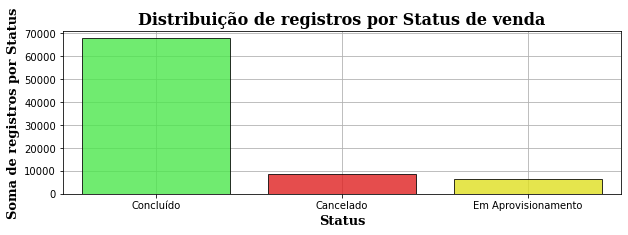

In [34]:
print(color.BOLD + "Quantidade de registros por Status (Percentual):" + color.END)
print("\n")
print(df["STATUS"].value_counts(normalize=True) * 100)

plt.figure(figsize=(10, 3))

sns.countplot(
    data=df_filtrado,
    x="STATUS",
    palette={
        "Concluído": "#33FF33",
        "Em Aprovisionamento": "yellow",
        "Cancelado": "red",
    },
    edgecolor="black",
    linewidth=1,
    alpha=0.8,
    zorder=3,
    order=df["STATUS"].value_counts().index[0:3],
)

plt.grid(True, zorder=0)

plt.title(
    "Distribuição de registros por Status de venda",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 16},
)
plt.xlabel(
    "Status",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 13},
)
plt.ylabel(
    "Soma de registros por Status",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 13},
)

#### Correlacionando as variáveis "ILHA"(no eixo horizontal) por "STATUS"(como legenda)

Quantidade de registros por Ilha (Percentual):


PA VIRTUAL        34.585009
FORMULÁRIO        27.806216
FIBRA             20.382693
WHATSAPP          12.994516
WEB 0800           3.662401
RENTABILIZAÇÃO     0.247410
AFILIADOS          0.212066
S2S EMP            0.064595
TLAG               0.035344
CHAT FIBRA         0.009750
Name: ILHA, dtype: float64


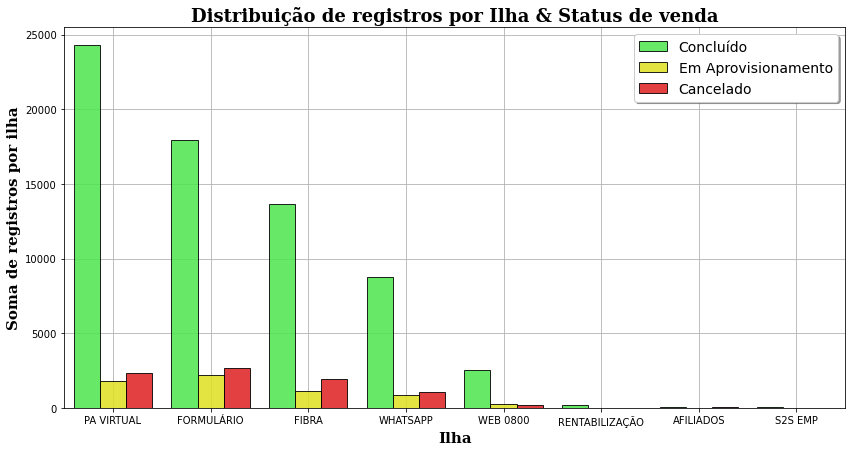

In [42]:
print(color.BOLD + "Quantidade de registros por Ilha (Percentual):" + color.END)
print("\n")
print(df["ILHA"].value_counts(normalize=True) * 100)


plt.figure(figsize=(14, 7))

order = df["ILHA"].value_counts().index
hue_order = ["Concluído", "Em Aprovisionamento", "Cancelado"]

sns.countplot(
    x="ILHA",
    hue="STATUS",
    order=order[0:8],
    hue_order=hue_order,
    data=df_filtrado,
    edgecolor="black",
    linewidth=1,
    alpha=0.85,
    zorder=3,
    palette={
        "Concluído": "#33FF33",
        "Em Aprovisionamento": "yellow",
        "Cancelado": "red",
    },
)

plt.grid(True, zorder=0)

plt.title(
    "Distribuição de registros por Ilha & Status de venda",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 18},
)
plt.xlabel(
    "Ilha",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)
plt.ylabel(
    "Soma de registros por ilha",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)

L = plt.legend(loc="upper right", fontsize=14, fancybox=True, shadow=True)

#### Correlacionando as variáveis "CANAL"(no eixo horizontal) por "STATUS"(como legenda)

Quantidade de registros por Canal (Percentual):


WEB DIRETO TLV      72.882389
TLV ATIVO           22.338818
TLV RECEPTIVO        2.416819
WEB                  1.802559
RENTABILIZAÇÃO       0.247410
WEB INDIRETO         0.209628
S2S EMP              0.064595
TELEAGENTES          0.035344
WEB INDIRETO EMP     0.002438
Name: CANAL, dtype: float64


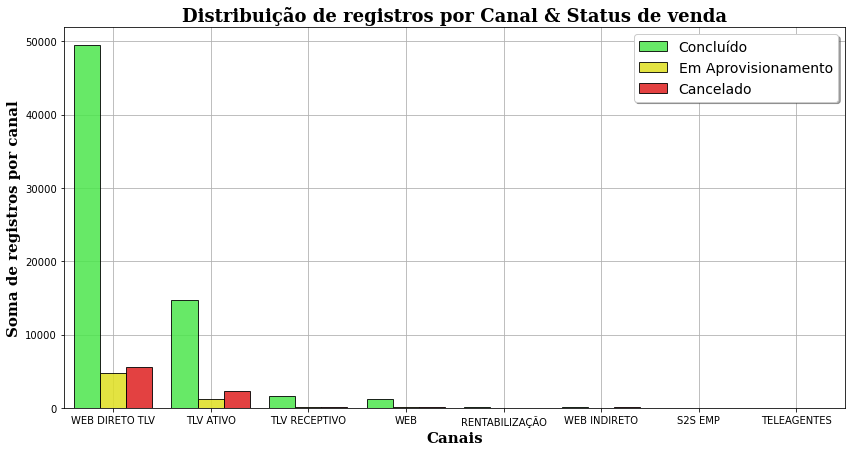

In [38]:
print(color.BOLD + "Quantidade de registros por Canal (Percentual):" + color.END)
print("\n")
print(df["CANAL"].value_counts(normalize=True) * 100)


plt.figure(figsize=(14, 7))

order = df["CANAL"].value_counts().index
hue_order = ["Concluído", "Em Aprovisionamento", "Cancelado"]

sns.countplot(
    x="CANAL",
    hue="STATUS",
    order=order[0:8],
    hue_order=hue_order,
    data=df_filtrado,
    edgecolor="black",
    linewidth=1,
    alpha=0.85,
    zorder=3,
    palette={
        "Concluído": "#33FF33",
        "Em Aprovisionamento": "yellow",
        "Cancelado": "red",
    },
)

plt.grid(True, zorder=0)

plt.title(
    "Distribuição de registros por Canal & Status de venda",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 18},
)
plt.xlabel(
    "Canais",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)
plt.ylabel(
    "Soma de registros por canal",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)

L = plt.legend(loc="upper right", fontsize=14, fancybox=True, shadow=True)

#### Correlacionando as variáveis "PLANO"(no eixo horizontal) por "STATUS"(como legenda)

Quantidade de registros por Plano (Percentual):


FIXO SEM LIMITES       49.870548
BANDA LARGA 200MBPS    26.192896
BANDA LARGA 400MBPS    21.726190
BANDA LARGA 500MBPS     1.284843
TOTAL HD                0.758566
BANDA LARGA 1GB         0.114934
BANDA LARGA 100MBPS     0.026616
OI FIBRA 200 MBPS       0.020567
MIX HD                  0.004839
Name: PLANO, dtype: float64


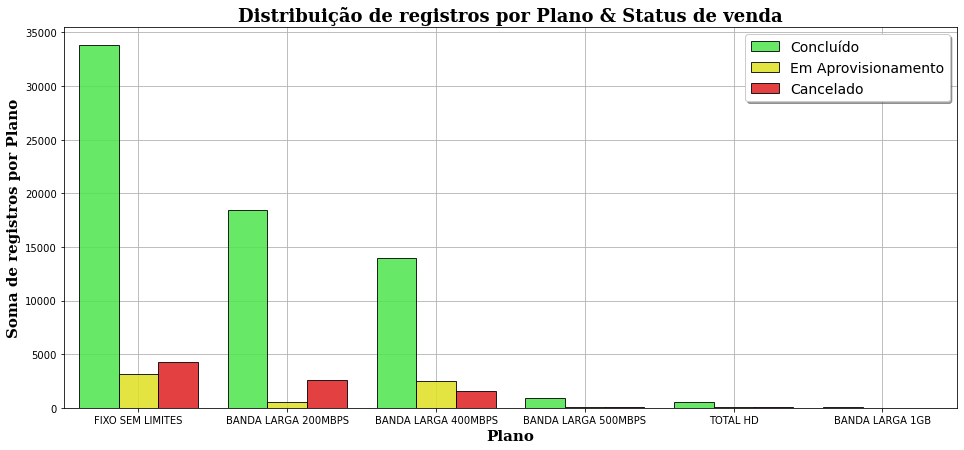

In [39]:
print(color.BOLD + "Quantidade de registros por Plano (Percentual):" + color.END)
print("\n")
print(df["PLANO"].value_counts(normalize=True) * 100)


plt.figure(figsize=(16, 7))

order = df["PLANO"].value_counts().index
hue_order = ["Concluído", "Em Aprovisionamento", "Cancelado"]

sns.countplot(
    x="PLANO",
    hue="STATUS",
    order=order[0:6],
    hue_order=hue_order,
    data=df_filtrado,
    edgecolor="black",
    linewidth=1,
    alpha=0.85,
    zorder=3,
    palette={
        "Concluído": "#33FF33",
        "Em Aprovisionamento": "yellow",
        "Cancelado": "red",
    },
)

plt.grid(True, zorder=0)

plt.title(
    "Distribuição de registros por Plano & Status de venda",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 18},
)
plt.xlabel(
    "Plano",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)
plt.ylabel(
    "Soma de registros por Plano",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)

L = plt.legend(loc="upper right", fontsize=14, fancybox=True, shadow=True)

#### Importando a base completa Mailing (contendo quase 2 milhões de registros)

In [28]:
df_mailing = pd.read_parquet(
    r"C:\Users\013809631\Box\Python_Scripts\Projeto_Oi_Tahto\Bases\Bases_Propensao\df_final_bases.parquet",
)

#### Cabeçalho do Dataframe - "df_mailing"

In [29]:
df_mailing.head()

,CAMPANHA,COD_MAILING,COD_CHAVE_CONTATO,DDD_E_TELEFONE_DISCADO,COD_ARVORE_MOTIVO,NOME_PRODUTO_left,DT_EVENTO_INI,DT_EVENTO_FIM,MATR_ATENDENTE,CPF_CNPJ,CODCONTATO,CODCAMPANHA,CODCHAVE,CODREGIAO,DTCADASTRO,SGUF,SGREGIONAL,CPFCNPJ,NOMEPRODUTO,NOMEMUNICIPIO,DDDTELEFONE1,DDDTELEFONE2,DDDTELEFONE3,DDDTELEFONE4,OBS1,OBS2,OBS3,OBS4,OBS5,OBS6,OBS7,OBS8,OBS9,OBS10,DATA_CARGA_right,UF,STATUS OPERACIONAL,MATRICULA,NOME,CARGO,CARGO RESUMIDO,AVAYA,DIGITRO,SIP,TRISTERIX,PDS A,PDS C / D,ID TTV,UG TTV,COD. SETOR,SETOR,LOCAL,ENTRADA,JORNADA,TIPO JORNADA,DATA ADM,DATA RESC.,DESLIGAMENTO CAGED,MAT. SUP.,SUPERVISOR,MAT. COORD.,COORDENADOR,MAT. GER. LOCAL,GERENTE LOCAL,MAT. GER. REL.,GERENTE DE REL.,MAT. DIRETORIA,DIRETORIA,GH GIP,STATUS GIP,STATUS FPW,INICIO FÉRIAS,ÚLTIMO DIA FÉRIAS,INÍCIO AFAST.,RETORNO AFAST.,CURSO,DATA INÍCIO,DATA ENTREGA,TEM PARENTESCO,DATA DO INFORME,NORMA CONDUTA,CÓDIGO ÉTICA,POLÍTICA ANTICORRUPÇÃO,TI LIVRO 1,TI LIVRO 2,TI LIVRO 3,TERMO PACTUAÇÃO,FOTO GERADA,CRACHÁ GERADO,ABANDONO,ÚLTIMA ATUALIZAÇÃO,MTR USUARIO,ID STC,INFOMAÇÕES DAP,TIPO CUSTO,RATEIO CUSTO,RESP CUSTO,STATUS_FINANCEIRO,SUB SETOR,ILHA GA,EM HOME BASED,MATRICULA_BC,COD_RETORNO,NOME_PRODUTO_right,NOME_GRUPO,INDICADOR,PRODUTO,CANAL,PARCEIRO,OPERAÇÃO,ILHA,DT_ABERTURA,NUMERO_PEDIDO,TIPO,DATA_PEDIDO,STATUS,DATA_STATUS,NUM_IDENTIDADE,NOME_CLIENTE,TELEFONE_CONTATO,TIPO_LOGRADOURO_COBRANCA,NOME_LOGRADOURO_COBRANCA,NUMERO_COBRANCA,TIPO_LOGRADOURO_INSTALACAO,NOME_LOGRADOURO_INSTALACAO,NUMERO_INSTALACAO,BAIRRO_INSTALACAO,MUNICIPIO_INSTALACAO,ESTADO_INSTALACAO,CEP_INSTALACAO,NUM_LOCALIDADE,DDD_FIXO,NUMERO_FIXO,VELOCIDADE,LINHA_PRODUTO,NUMERO_DOCUMENTO,TIPO_PROMOCAO,PLANO_BUNDLE,TIPO_POSSE_COMBO,FLG_MIG_COBRE_FIXO,FLG_MIG_COBRE_VELOX,FLG_VENDA_VALIDA,NOVA_UGR,PDV_NOVA_REGRA,CANAL_NOVA_REGRA,OPERACAO_NOVA_REGRA,PARCEIRO_NOVA_REGRA,DT_ABERTURA_NOVA_REGRA,LOGIN_VENDEDOR_NOVA_REGRA,CANAL_BOV_NOVA_REGRA,METODO_PAGAMENTO,PLANO
0,TLV_ATV_FIBRA,3-0000102147,55996294454,55996294454,10000000352,FIBRA,2021-11-06 16:01:26,2021-11-06 16:01:26,0,1717628001,147934398,1000002130,55996294454,R2,2021-10-26 12:00:00,RS,RSUL,1717628001,FIBRA,SANTA MARIA,55996294454,NaN,NaN,NaN,None,None,None,None,PROPENSAO =15,None,None,Localidade = SMA,DIAS_DE_VIGENCIA=15,PERFIL = AQUI0P_B1,2021-11-03 16:53:35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000000352,OPTOUT,BLACKLIST ANATEL ...,None,None,None,None,None,None,NaN,None,None,NaN,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,None,NaN,NaN,NaN,NaN,None,None,NaN,None,None,None,None,None,None,None,NaN,None,None,None,NaN,None,None,None,None
1,TLV_NOVAFIBRA_ATIVO,3-0000102144,21991819829,19994407516,10000000269,FIBRA,2021-11-03 13:53:51,2021-11-03 13:53:51,0,6446355688,147968995,1000002453,21991819829,R1,2021-10-26 00:00:00,RJ,RSE,6446355688,FIBRA,TERESOPOLIS,21991819829,2.130970e+09,1.999441e+10,3.199158e+10,None,None,None,None,PROPENSAO =17,None,None,Localidade = TRL,DIAS_DE_VIGENCIA=15,PERFIL = AQUI_NOVA_FIBRA,2021-11-03 16:52:03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000000269,TELEFONIA,CHAMADA CAIU ...,None,None,None,None,None,None,NaN,None,None,NaN,None,NaN,None,None,NaN,None,None,NaN,None,None,NaN,None,None,None,NaN,NaN,NaN,NaN,None,None,NaN,None,None,None,None,None,None,None,NaN,None,None,None,NaN,None,None,None,None
2,CAMP_FIBRA_CARB4,3-0000102461,69999492502,21969079950,10000000007,FIBRA,2021-11-19 15:47:20,2021-11-19 15:47:20,0,53930185253,151823609,1000002130,69999492502,R2,2021-11-10 12:00:00,RO,RCN,53930185253,FIBRA,CACOAL,69999492502,8.398602e+10,2.196908e+10,3.498701e+10,None,No

#### Correlacionando as variáveis "SGUF"(no eixo horizontal) por "CANAL"(como legenda)

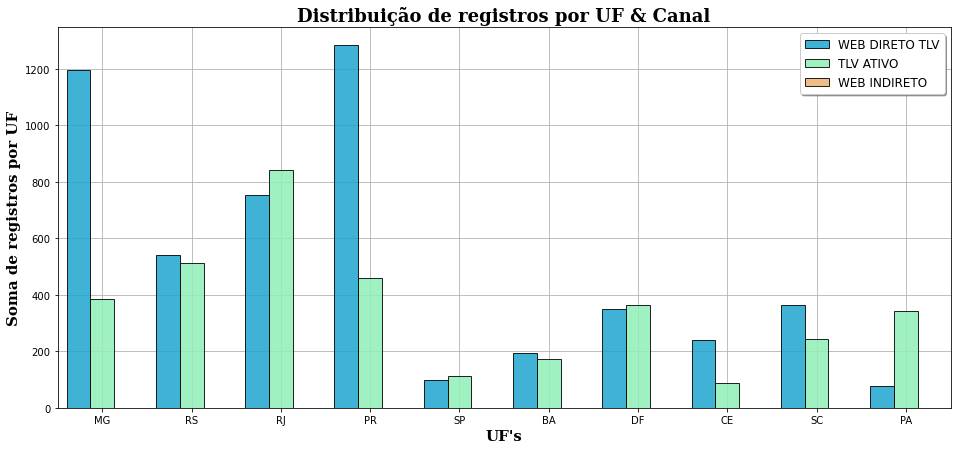

In [30]:
plt.figure(figsize=(16, 7))

order = df_parquet["SGUF"].value_counts()[0:10]

sns.countplot(
    x="SGUF",
    hue="CANAL",
    order=order.index,
    data=df_mailing,
    edgecolor="black",
    linewidth=1,
    alpha=0.85,
    zorder=3,
    palette="rainbow",
)

plt.grid(True, zorder=0)

plt.title(
    "Distribuição de registros por UF & Canal",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 18},
)
plt.xlabel(
    "UF's",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)
plt.ylabel(
    "Soma de registros por UF",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)

L = plt.legend(loc="upper right", fontsize=12, fancybox=True, shadow=True)

#### Correlacionando as variáveis "SGUF"(no eixo horizontal) por "STATUS"(como legenda)

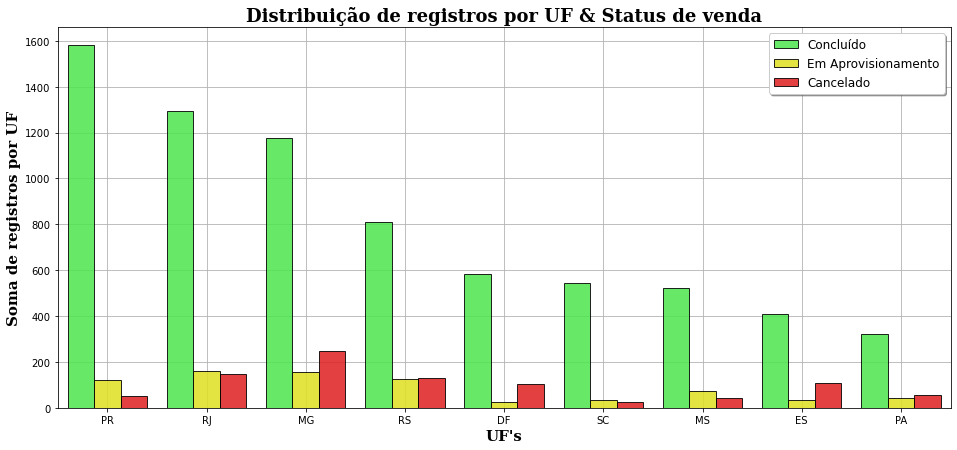

In [31]:
plt.figure(figsize=(16, 7))

order = ["PR", "RJ", "MG", "RS", "DF", "SC", "MS", "ES", "PA"]
hue_order = ["Concluído", "Em Aprovisionamento", "Cancelado"]

sns.countplot(
    x="SGUF",
    hue="STATUS",
    order=order,
    hue_order=hue_order,
    data=df_mailing,
    edgecolor="black",
    linewidth=1,
    alpha=0.85,
    zorder=3,
    palette={
        "Concluído": "#33FF33",
        "Em Aprovisionamento": "yellow",
        "Cancelado": "red",
    },
)

plt.grid(True, zorder=0)

plt.title(
    "Distribuição de registros por UF & Status de venda",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 18},
)
plt.xlabel(
    "UF's",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)
plt.ylabel(
    "Soma de registros por UF",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)

L = plt.legend(loc="upper right", fontsize=12, fancybox=True, shadow=True)

<br>
<hr>